# Quickstart with CatBoost 🚀🐈 - Multinomial Classifier with Categorical Features
## Install all the things

In [12]:
!pip3 install graphviz
!pip3 install ipywidgets
!pip3 install shap
!pip3 install seaborn
# !pip3 install sklearn pandas numpy

You should consider upgrading via the '/Users/Shared/Dev/learning-stuff/ml/env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Shared/Dev/learning-stuff/ml/env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Shared/Dev/learning-stuff/ml/env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Shared/Dev/learning-stuff/ml/env/bin/python3 -m pip install --upgrade pip' command.


In [13]:
import io
import sys
import json
from time import time
from datetime import datetime, timedelta
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import tempfile

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, auc, accuracy_score, roc_auc_score, confusion_matrix, roc_curve

%matplotlib inline

In [14]:
%pip install catboost
from catboost import CatBoostClassifier, Pool
import random

def seed_everything(seed=None):
    if seed is None:
        seed = np.random.randint(100)
    random.seed(seed)
    np.random.seed(seed)
    return seed
seed = seed_everything(42)

You should consider upgrading via the '/Users/Shared/Dev/learning-stuff/ml/env/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Categorical Data
#### Attempting to predict car brand from other fields

In [15]:
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


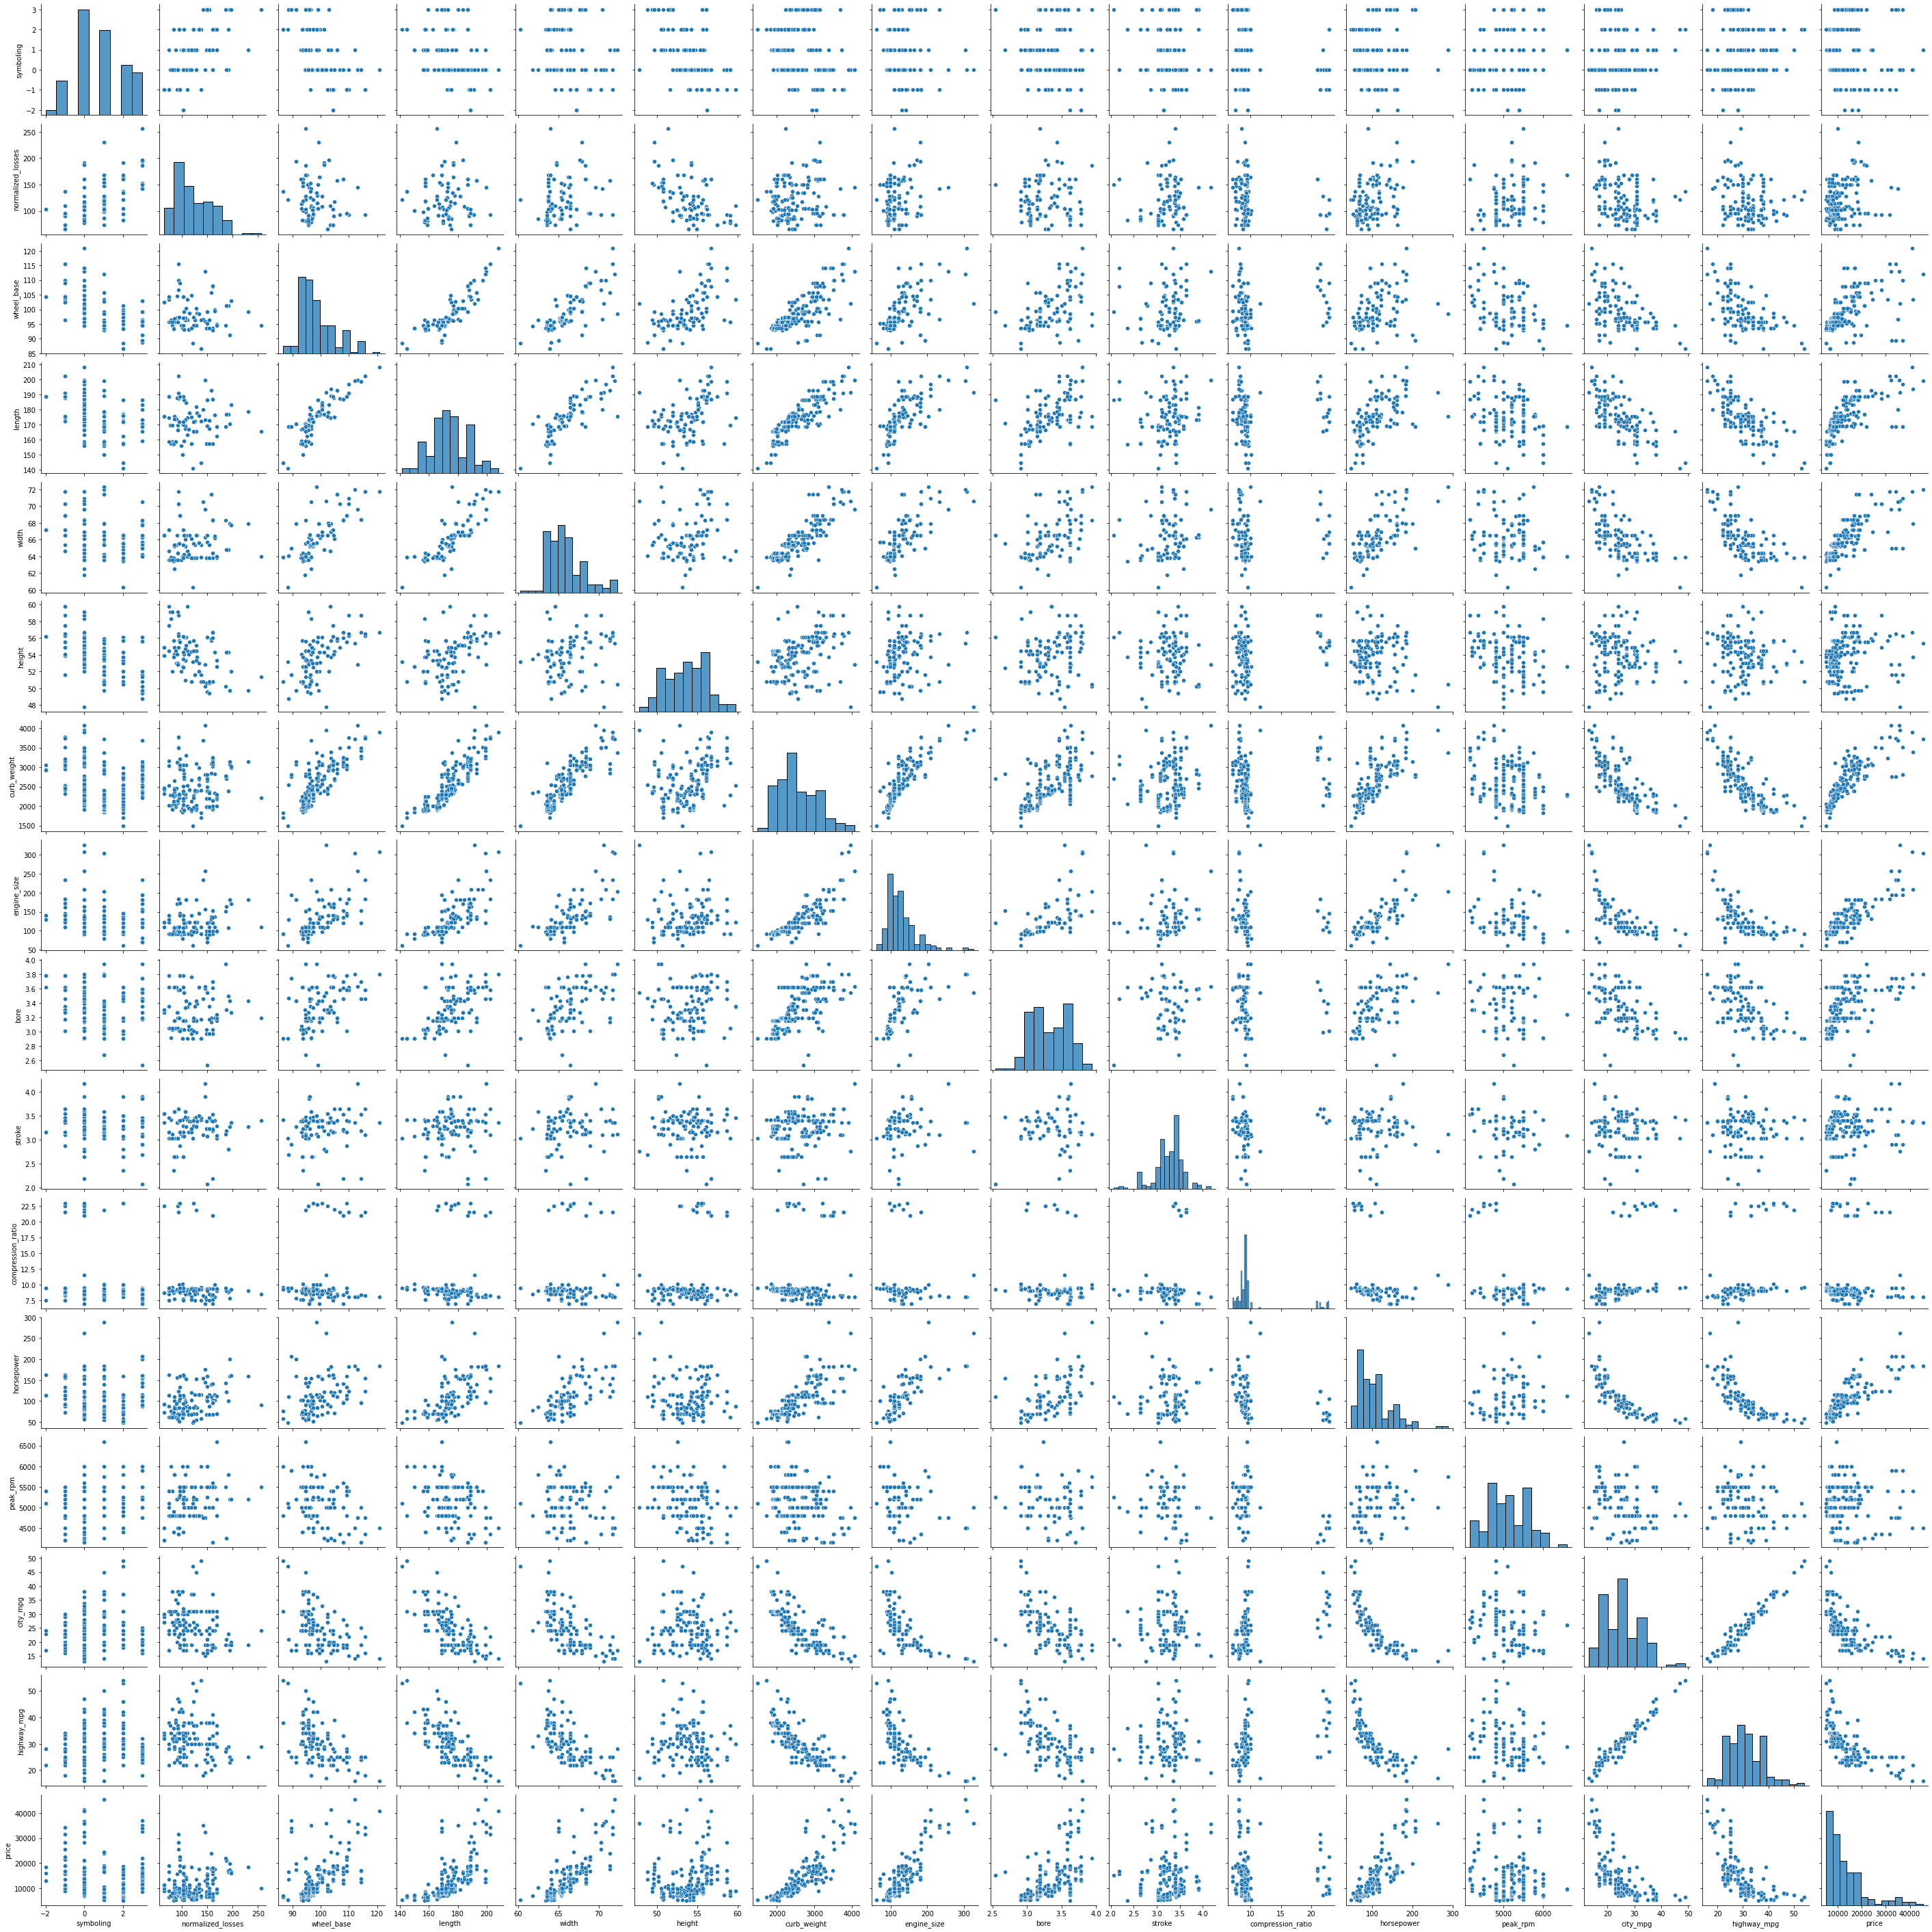

In [16]:
sns.pairplot(df)

In [17]:
filter_ = ~(df.isin([np.nan, np.inf, -np.inf]).any(axis=1))
df = df.loc[filter_]
X_tr, X_eval = train_test_split(df, test_size=0.5)


y_tr = X_tr.make
y_eval = X_eval.make

X_tr = X_tr.drop(columns=['make'])
X_eval = X_eval.drop(columns=['make'])

features = [col_name for col_name in X_tr.columns if col_name != 'make']
cat_features = [col_name for col_name in features if X_tr[col_name].dtype == 'object']


train_dataset = Pool(X_tr, y_tr, feature_names=list(X_tr.columns), cat_features=cat_features)

model_params = {
    'iterations': 500, 
    'loss_function': 'MultiClass', 
    'train_dir': 'crossentropy',
    'allow_writing_files': False,
    'random_seed': 42,
}

model = CatBoostClassifier(**model_params)
model.fit(train_dataset, verbose=True, plot=True)

Learning rate set to 0.124874


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.7024644	total: 42.5ms	remaining: 21.2s
1:	learn: 2.6192131	total: 71.5ms	remaining: 17.8s
2:	learn: 2.5684146	total: 111ms	remaining: 18.4s
3:	learn: 2.5084502	total: 144ms	remaining: 17.9s
4:	learn: 2.4567146	total: 177ms	remaining: 17.5s
5:	learn: 2.4192304	total: 202ms	remaining: 16.7s
6:	learn: 2.3594589	total: 237ms	remaining: 16.7s
7:	learn: 2.3070433	total: 275ms	remaining: 16.9s
8:	learn: 2.2308811	total: 292ms	remaining: 15.9s
9:	learn: 2.2045683	total: 297ms	remaining: 14.5s
10:	learn: 2.1727830	total: 309ms	remaining: 13.7s
11:	learn: 2.1375239	total: 330ms	remaining: 13.4s
12:	learn: 2.1010268	total: 357ms	remaining: 13.4s
13:	learn: 2.0580992	total: 373ms	remaining: 13s
14:	learn: 2.0232592	total: 402ms	remaining: 13s
15:	learn: 1.9886973	total: 423ms	remaining: 12.8s
16:	learn: 1.9713646	total: 439ms	remaining: 12.5s
17:	learn: 1.9405038	total: 467ms	remaining: 12.5s
18:	learn: 1.8909231	total: 492ms	remaining: 12.5s
19:	learn: 1.8566940	total: 516ms	remaining

In [18]:
predictions = model.predict(X_eval)
# preds_proba = model.predict_proba(eval_dataset)

# print('Creating classification evaluation report')
DFT_THRD = 0.5           # Set decision threshold

report_dict = {}
report_dict = classification_report(y_eval, predictions, output_dict=True)
# print(predictions)
report_dict['accuracy'] = accuracy_score(y_eval, predictions)
report_dict['confusion'] = confusion_matrix(y_eval, predictions).tolist()
report_dict['model_features'] = X_tr.columns.to_list()

importances = model.get_feature_importance()
# std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0).tolist()
indices = np.argsort(importances)[::-1]
report_dict['feature_importance'] = {X_tr.columns[idx]: float(importances[idx]) for idx in indices}

from IPython.display import JSON
JSON(report_dict)

/Users/Shared/Dev/learning-stuff/ml/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Shared/Dev/learning-stuff/ml/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Shared/Dev/learning-stuff/ml/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

<IPython.core.display.JSON object>

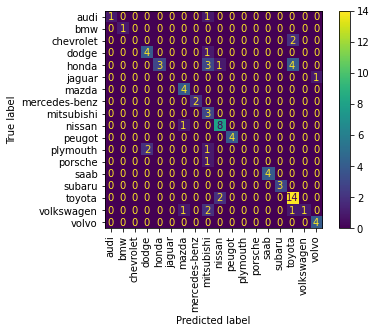

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_eval, y_eval, xticks_rotation='vertical')  
plt.show()  

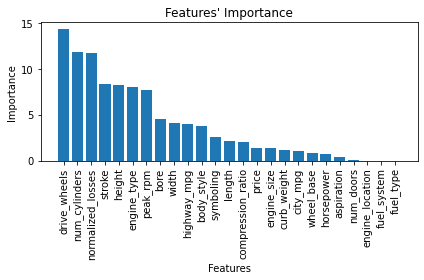

In [24]:
feat_imp_index = report_dict['feature_importance'].keys()
feat_imp_vals = report_dict['feature_importance'].values()

plt.title("Features' Importance")
plt.bar(feat_imp_index, feat_imp_vals)
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()